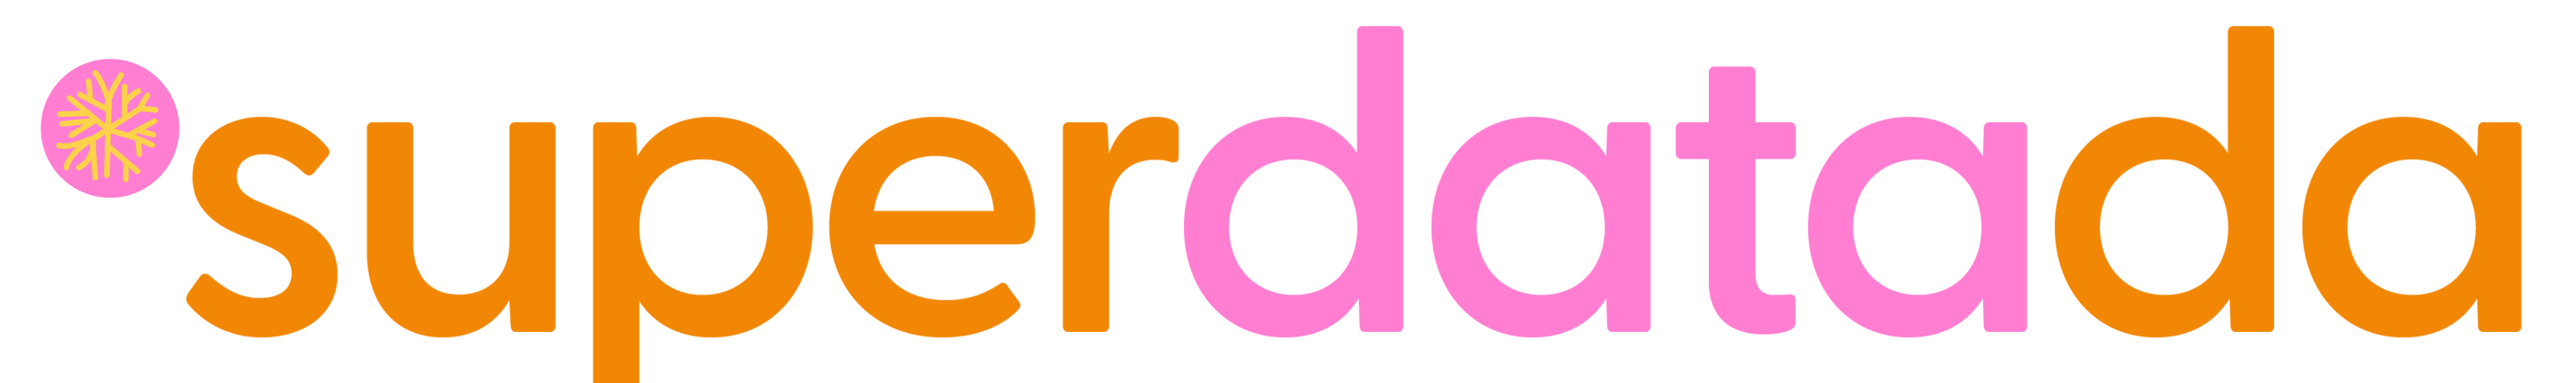

# 😩🇲🇽 ¡Trabajar en México cansa... y no es tu culpa!

¿Sientes que trabajas como si fueras dos personas pero cobras como media? 🫠  
¿Te preguntas por qué tu alma ya abandonó tu cuerpo a mitad de junio? 😵‍💫  
Bueno, *no estás loco*... ¡es que en México casi no hay días feriados! 😭


## 📆 Días Feriados: México vs Argentina

| País        | Días Feriados 🥳 |
|-------------|------------------|
| 🇲🇽 México   | 7 (siete... sí, solo 7 😐) |
| 🇦🇷 Argentina | 19 (¡DIECINUEVE! 😎 mate y descanso) |

> Sí, leíste bien. Los argentinos tienen 12 días más para rascarse la panza. 🤷‍♂️


## 🧠 Jornada laboral promedio: el drama continúa

Mientras en México te rifas **8 horas al día** como campeón olímpico del Excel 🥇,  
otros países ya andan en **modo chill** con jornadas de 37-38 horas semanales.  
(O sea, **1 hora menos por día**... que sí parece poco, pero suma ¡y cómo! 😵)



## 🏖️ Vacaciones legales: el otro chisme

En México, la ley te da:

- 12 días de vacaciones tras el primer año.  
- Suben gradualmente hasta 20 días al cumplir 5 años. 🎉

En Alemania, por ejemplo, te sueltan más de **24 días** al año de vacaciones pagadas desde el principio. 🇩🇪  
¡Eso ya parece sabático! 😎



## 🧮 Fórmula para calcular las horas reales trabajadas al año

Sí, vamos a ponernos técnicos… pero solo un poco 😌

$
\text{Horas Reales Trabajadas} = (260 - D_v - D_f) \times J
$

**Donde:**

- $260$: número promedio de días laborales al año.  
- $D_v$: días de vacaciones.  
- $D_f$: días feriados.  
- $J$: jornada laboral promedio diaria (en horas).


## 🗺️ ¿Y si hacemos un mapa?

La idea sería mostrar un mapa del mundo 🌍 donde se comparen las **horas trabajadas realmente** en cada país.  
Spoiler: México está en los primeros lugares... pero no por productividad, sino por exceso de chamba. 😬


## 🧘 Conclusión zen 

México trabaja mucho y descansa poco.  
Argentina trabaja menos... y descansa más.  
Y tú aquí, leyendo esto en horario laboral 🫣.


Tal vez sea hora de una reforma laboral.  
O mínimo... del Día de los Tacos  🌮😉

### Motivación y descarga de datos:
- https://www.qppstudio.net/public-holidays-by-date/next-month.htm


- https://clockify.me/es/horas-laborales


- https://ourworldindata.org/working-hours


- https://worldpopulationreview.com/country-rankings/average-work-week-by-country#title

- https://www.naturalearthdata.com/downloads/


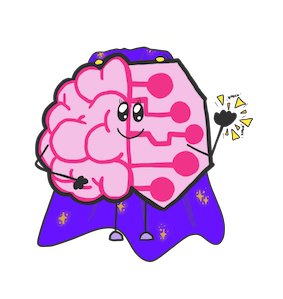

# Prep ⚙️

In [ ]:
import pandas as pd
import folium
import branca
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import folium
import branca
from branca.element import Element

# Data 👩‍💻

In [3]:
# Cargar el archivo CSV con los datos de la jornada laboral promedio por país para 2025
df_work = pd.read_csv("average-workweek-by-country-2025.csv")

# Crear una nueva columna 'daily_hours' dividiendo las horas semanales promedio entre 5 días laborales
# Asumimos que la semana laboral estándar tiene 5 días
df_work["daily_hours"] = (
    df_work["AvgWorkWeek_AvgWeeklyHoursWorkedAllGendersViaILOSTAT_hrs_Est2025"] / 5
)

# Mostrar estadísticas descriptivas básicas de la columna 'daily_hours'
print(df_work["daily_hours"].describe())

count    189.000000
mean       7.734383
std        1.073114
min        5.178000
25%        6.990000
50%        7.812000
75%        8.474000
max       10.898000
Name: daily_hours, dtype: float64


In [5]:
# Cargar archivo CSV con datos de días promedio de vacaciones por país para 2025
df_vacation = pd.read_csv("average-vacation-days-by-country-2025.csv")

# Información adicional para Estados Unidos
# Según fuentes externas:
# - Vacaciones pagadas (paid vacation days): 13 días
# - Días feriados pagados (paid public holidays): 11 días
# Total días pagados = 24 (suma de vacaciones + feriados)

# Crear un diccionario con los datos de Estados Unidos para agregar al DataFrame
new_row = {
    "flagCode": "US",
    "country": "United States",
    "TotalPaidLeave": 24.0,  # Total días pagados (vacaciones + feriados)
    "PaidPublicHolidays": 11.0,  # Días feriados pagados
    "PaidVacationDaysByYear": 13.0,  # Días de vacaciones pagadas anuales
}

# Convertir el diccionario en un DataFrame (de una sola fila)
new_row_df = pd.DataFrame([new_row])

# Concatenar la nueva fila al DataFrame original
# ignore_index=True para que el índice se renumere correctamente
df_vacation = pd.concat([df_vacation, new_row_df], ignore_index=True)
df_vacation

,flagCode,country,TotalPaidLeave,PaidPublicHolidays,PaidVacationDaysByYear
0,IR,Iran,53.0,27.0,26.0
1,BF,Burkina Faso,45.0,15.0,30.0
2,KH,Cambodia,45.0,27.0,18.0
3,AD,Andorra,45.0,14.0,31.0
4,BH,Bahrain,44.0,14.0,30.0
...,...,...,...,...,...
181,JM,Jamaica,10.0,NaN,10.0
182,SM,San Marino,10.0,NaN,10.0
183,BT,Bhutan,9.0,NaN,9.0
184,NG,Nigeria,5.0,NaN,5.0


# Formulazo 💥

In [9]:
# Calcular los días efectivos de trabajo restando los días pagados (vacaciones + feriados) de los 260 días laborables promedio
df_vacation["work_days"] = 260 - df_vacation["TotalPaidLeave"]

# Unir los DataFrames de vacaciones y jornada laboral usando columnas clave ('flagCode' y 'country')
df_work_vacation = df_vacation.merge(df_work, on=["flagCode", "country"])

# Calcular el total de horas trabajadas al año = días efectivos * horas diarias promedio
df_work_vacation["total_hours"] = (
    df_work_vacation["work_days"] * df_work_vacation["daily_hours"]
)

# Mostrar el resultado para México y Argentina (flagCode == 'MX')
df_work_vacation[df_work_vacation.flagCode.isin(["MX","AR"])]

,flagCode,country,TotalPaidLeave,PaidPublicHolidays,PaidVacationDaysByYear,work_days,AvgWorkWeek_AvgWeeklyHoursWorkedAllGendersViaILOSTAT_hrs_Est2025,AvgWorkWeek_AvgWeeklyHoursWorkedMalesViaILOSTAT_hrs_Est2025,AvgWorkWeek_AvgWeeklyHoursWorkedFemalesViaILOSTAT_hrs_Est2025,AvgWorkWeek_AvgYearlyHoursWorkedViaOECD_hrs_2023,daily_hours,total_hours
85,AR,Argentina,29.0,19.0,10.0,231.0,34.68,38.45,29.66,NaN,6.936,1602.216
145,MX,Mexico,19.0,7.0,12.0,241.0,42.13,45.24,37.49,2207.0,8.426,2030.666


In [10]:
df_work_vacation.sort_values("total_hours")

,flagCode,country,TotalPaidLeave,PaidPublicHolidays,PaidVacationDaysByYear,work_days,AvgWorkWeek_AvgWeeklyHoursWorkedAllGendersViaILOSTAT_hrs_Est2025,AvgWorkWeek_AvgWeeklyHoursWorkedMalesViaILOSTAT_hrs_Est2025,AvgWorkWeek_AvgWeeklyHoursWorkedFemalesViaILOSTAT_hrs_Est2025,AvgWorkWeek_AvgYearlyHoursWorkedViaOECD_hrs_2023,daily_hours,total_hours
23,YE,Yemen,37.0,15.0,22.0,223.0,25.89,26.42,18.03,NaN,5.178,1154.694
35,NO,Norway,35.0,10.0,25.0,225.0,27.10,29.45,24.48,1418.0,5.420,1219.500
94,NL,Netherlands,28.0,8.0,20.0,232.0,26.77,30.44,22.65,1413.0,5.354,1242.128
18,AT,Austria,38.0,13.0,25.0,222.0,28.41,32.07,24.28,1435.0,5.682,1261.404
29,DK,Denmark,36.0,11.0,25.0,224.0,28.75,31.23,25.97,1380.0,5.750,1288.000
...,...,...,...,...,...,...,...,...,...,...,...,...
106,CG,Republic of the Congo,26.0,NaN,26.0,234.0,48.73,49.17,48.25,NaN,9.746,2280.564
173,LR,Liberia,11.0,11.0,NaN,249.0,47.53,49.00,45.92,NaN,9.506,2366.994
126,LS,Lesotho,22.0,10.0,12.0,238.0,50.20,51.52,48.43,NaN,10.040,2389.520
137,SD,Sudan,20.0,NaN,20.0,240.0,50.76,51.90,45.70,NaN,10.152,2436.480


# Mapa 🗺️

Descarga: https://www.naturalearthdata.com/downloads/

In [ ]:
# Cargar el shapefile con los límites de los países
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Hacer un merge para unir los datos de horas trabajadas por país con el shapefile
# 'ISO_A2_EH' es el código de país en el shapefile
# 'flagCode' es el código en nuestro DataFrame con datos laborales
world = world.merge(
    df_work_vacation[["total_hours", "flagCode"]],
    how="left",
    left_on="ISO_A2_EH",
    right_on="flagCode",
)

# Reemplazar los valores NaN en 'total_hours' con 0 para evitar problemas en futuros análisis o gráficos
world["total_hours"].fillna(0, inplace=True)

# Redondear los valores de 'total_hours' a 0 decimales para mejor presentación
world["total_hours"] = world["total_hours"].round(0)

/var/folders/v7/cl4hbmdd3ll2lthltrhxjyjh0000gn/T/ipykernel_30215/826627518.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  world.fillna(0, inplace=True)


In [ ]:
# Crear un mapa base centrado en el mundo con zoom inicial adecuado y estilo claro
m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")

# Convertir el GeoDataFrame a formato GeoJSON en EPSG:4326 (lat-lon) para Folium
world_geojson = world.to_crs(epsg=4326).to_json()


# Función para definir el estilo de cada país según el total de horas trabajadas
def style_function(feature):
    total_hours = feature["properties"]["total_hours"]
    # Normalizar valores para asignar color
    norm = plt.Normalize(vmin=1000, vmax=world["total_hours"].max())
    cmap = plt.get_cmap("coolwarm")  # Elegimos colormap 'coolwarm'

    rgba_color = cmap(norm(total_hours))  # Obtener color RGBA normalizado
    hex_color = mcolors.rgb2hex(rgba_color[:3])  # Convertir a formato hexadecimal

    return {
        "fillColor": hex_color,
        "color": "black",  # Borde negro para países
        "weight": 1,  # Grosor del borde
        "fillOpacity": 0.7,  # Opacidad para ver el color pero mantener el mapa legible
    }


tooltip = folium.GeoJsonTooltip(
    fields=["NAME_LONG", "total_hours"],
    aliases=["Country:", "Total Hours:"],
    localize=True,
    sticky=True,
    style="""
        background-color: white;
        border: 1px solid black;
        border-radius: 3px;
        box-shadow: 3px;
        font-size: 16px;   /* Aquí aumentas el tamaño */
        padding: 5px;
    """,
)

# Añadir capa GeoJSON al mapa con estilo y tooltips definidos
folium.GeoJson(
    world_geojson, name="Countries", style_function=style_function, tooltip=tooltip
).add_to(m)

# Crear leyenda personalizada usando branca basada en la escala 'coolwarm' de matplotlib
min_value = 1000
max_value = world["total_hours"].max()
cmap = plt.get_cmap("coolwarm")

# Crear lista de colores del colormap para la leyenda
color_list = [mcolors.rgb2hex(cmap(i)) for i in range(cmap.N)]


# CSS personalizado para aumentar tamaño y peso de la fuente de la leyenda
css = """
<style>
    .legend .caption {
        font-size: 16px !important;
}
</style>
"""

m.get_root().header.add_child(Element(css))
# Crear la leyenda con branca.colormap como antes
legend = branca.colormap.LinearColormap(
    colors=color_list,
    vmin=min_value,
    vmax=max_value,
    caption="Total Hours Worked Annually",


)

# Añadir la leyenda al mapa
legend.add_to(m)

# Guardar mapa interactivo en archivo HTML
m.save("chamba_mapa.html")